In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

## Linear Equation

Gaussian elimination. Implement it. Do it once in your life. The use `np.linalg.solve` for the rest.

In [82]:
# Ax = B
A = np.array([
    [1, 1, 1.],
    [2, -1, 3],
    [5, -2, -1]
])
B = np. array([6, 9, -2])

In [84]:
def forward(A, B):  # return A and B after doing forward elim
    a = A.copy()
    b = B.copy()

    n_row, _ = a.shape

    for fr in range(n_row-1):  # focus row
        for tr in range(fr+1, n_row):  # target row
            c = a[tr, fr]/a[fr, fr]
            a[tr] = a[tr] - c * a[fr]
            b[tr] = b[tr] - c * b[fr]
    return a, b


def backward(A, B):
    a = A.copy()
    b = B.copy()

    n_row, _ = a.shape

    # normalize
    for i_row in range(n_row):
        c = a[i_row, i_row]
        a[i_row] = a[i_row]/c
        b[i_row] = b[i_row]/c

    # backward
    for fr in range(n_row-1, 0, -1):
        for tr in range(fr):
            c = a[tr, fr]/a[fr, fr]
            a[tr] = a[tr] - c*a[fr]
            b[tr] = b[tr] - c*b[fr]
    return b


def gauss_elim(A, B):
    a, b = forward(A, B)
    b = backward(a, b)
    return b


c = gauss_elim(A, B)
np.dot(A, c), B

(array([ 6.,  9., -2.]), array([ 6,  9, -2]))

In [72]:
np.random.seed(1234) # put this here
A = np.random.rand(1000,1000)
B = np.random.rand(1000)



In [75]:
answer = gauss_elim(A, B)
print(answer)

[ 1.18795577e+00  1.11163925e+00 -5.45085329e-01 -1.19667304e+00
  9.35607069e-01  6.48246680e-02 -7.67509329e-01 -2.54530884e+00
  1.13429488e+00 -1.28504449e+00  6.94386791e-01 -4.18503977e-01
  4.14474294e-01  1.49499240e-01  1.39501713e+00  1.16282169e+00
  1.24123643e+00  4.01980150e-01 -5.31917933e-01  2.99016152e-01
 -1.32373637e+00 -8.34414778e-01  8.85397956e-01  1.74899504e-01
  1.87818025e-01  1.22905234e+00  3.83245976e-01 -1.20624128e+00
  4.04317292e-01  7.38637130e-03  1.66903080e+00  2.67942807e-01
  1.43836933e+00  4.51305182e-01 -6.23904746e-01 -1.34422182e+00
 -6.18727220e-01 -9.41077636e-01  1.50643060e-01  1.76938598e+00
  3.70050257e-01 -8.77634520e-01 -8.34946230e-02 -8.37827735e-01
 -3.36231175e-02  5.54161200e-01  2.43531832e+00  6.45341715e-01
  1.16151275e+00 -6.41080407e-01  9.01424678e-01 -1.11913522e+00
 -3.24680946e-01 -8.14912132e-01  7.00745227e-01 -5.26913623e-01
 -1.27140862e+00 -9.16013712e-01  2.64503143e+00 -7.87342733e-01
 -8.60387933e-01  8.67450

In [80]:
max(np.abs(np.dot(A, answer) - B))

1.1799480281737829e-09

In [ ]:
# A* answer sho

### Linear Regression

1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [88]:
data_x, data_y = np.loadtxt('linear.txt')

2) Plot `data_x` vs `data_y`

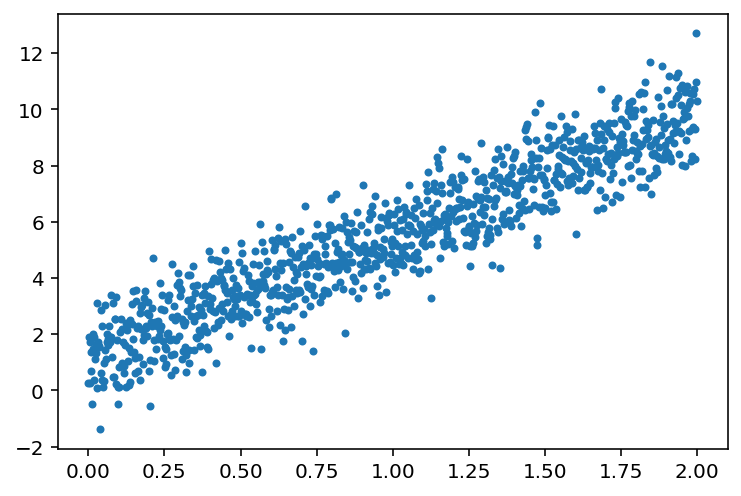

In [89]:
plt.plot(data_x, data_y, '.')

3) What what is the equation for a striaght line?

4) What is the difference between a "good line" and a "bad line"?

5) What are we trying to adjust to minimize the $\chi^2$?

6) How do we find the minimum of $\chi^2$? Whare are they? Write the EQ.

7) Find the best slope and the best intercept.

In [101]:
# note sum(x**2) is not sum(x)**2

def linear_fit(xs, ys):
    def sx(i):
        return np.sum(xs**i)
    def sxy(i):
        return np.sum(xs**i*ys)
    A = np.array([
        [sx(2), sx(1)],
        [sx(1), sx(0)]
    ])   
    B = np.array([ sxy(1), sxy(0)])
    
    return gauss_elim(A, B)

In [102]:
a, b = linear_fit(data_x, data_y)
print(a,b)

4.308054374604932 1.195809159619785


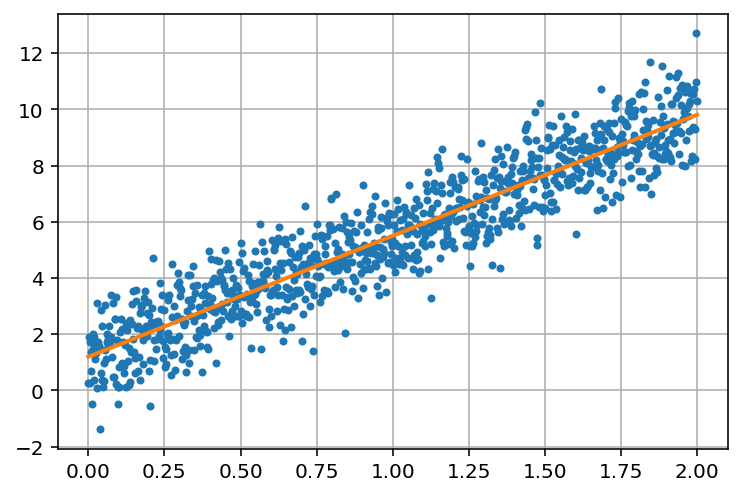

In [103]:
plt.plot(data_x, data_y, '.')
pred_y = a*data_x + b
plt.plot(data_x, pred_y, lw = 2)
plt.grid()

8) Plot the line along with the data point to verify that you actually got the right answer.

9) What is your prediction for the value of `y` when `x`=3.0?

### Generalization

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

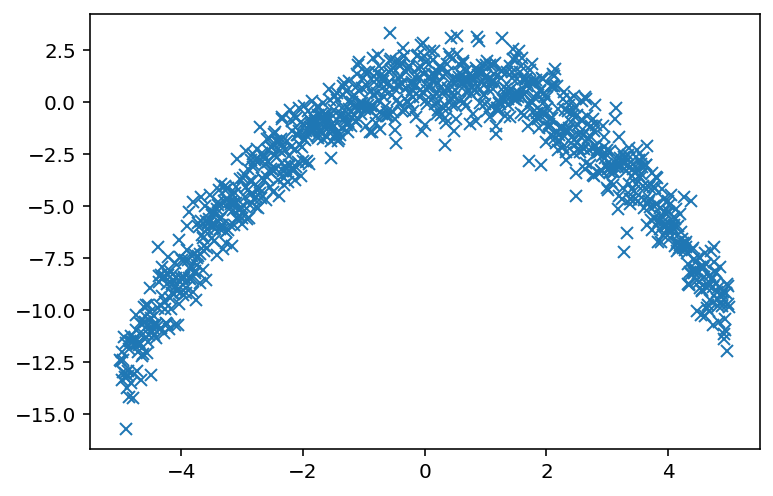

In [105]:
data_x, data_y = np.loadtxt('parabola.txt')
plt.plot(data_x, data_y,'x')

2) What is the general form for parabola?

In [106]:
# use np.linalg.solve


3) What is the difference between a "good line" and a "bad line"?

4) What are we trying to minimize in order to find the best parabola?

5) Find the best fitted parabola and plot to verify.

In [107]:
def para_fit(xs, ys):
    def sx(i):
        return np.sum(xs**i)
    def sxy(i):
        return np.sum(xs**i*ys)
    A = np.array([
        [sx(4), sx(3), sx(2)],
        [sx(3), sx(2), sx(1)],
        [sx(2), sx(1), sx(0)]
    ])   
    B = np.array([ sxy(2), sxy(1), sxy(0)])
    return gauss_elim(A, B)

In [109]:
a, b, c = para_fit(data_x, data_y)
print(a,b,c)

-0.5049351618447855 0.30585873364113725 0.9766805557453889


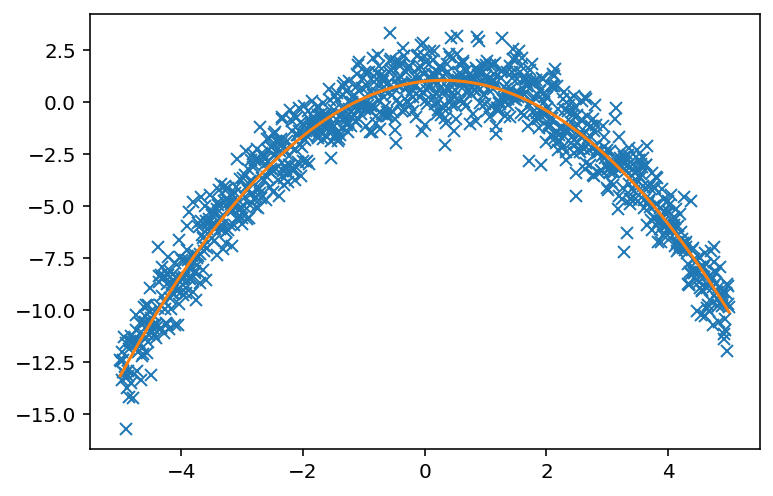

In [110]:
plt.plot(data_x, data_y, 'x')
y_pred = a*data_x**2 + b*data_x + c
plt.plot(data_x, y_pred)

# Higher Dimension.

Also, there is no need to stop at 2 dimension.

In [3]:
np.random.seed(1234567)
def gen_child_height_sample(n_data=100):
    father_height = np.random.randn(n_data)*20 + 170
    mother_height = np.random.randn(n_data)*20 + 160
    # just pretend you didn't see this
    child_height = 0.8*mother_height + 0.2*father_height + 5 + np.random.randn(n_data)*10
    return father_height, mother_height, child_height

father_height, mother_height, child_height = gen_child_height_sample()

We have a reason to believe that a child height is a linear combination of mother's and father's height.

$$
h_{child} = c_{mom} \times h_{mom} + c_{dad} \times h_{dad} + h_0
$$

1.) Plot mother_height vs child_height and father_height vs child_height.

2.) Find appropriate $c_{mom}$ and $c_{dad}$

3) Now that you can't really plot the line on top of distribution to check the answer anymore since you have more than 2 dimensions.

Try plot $h_{child, predicted}$ vs $h_{child, data}$. What do you expect to see and did you get what you expect?

## Even More generalization. Power Law.

Most of physics formula comes in the form of

$Y = K \times A^\alpha B^\beta C^\gamma$

Ex:
- $ F = ma$
- $ K = \frac{1}{2} m v^2$
- $ c = \frac{1}{\sqrt{\mu_0, \epsilon_0}}$

1) How do we turn power law in to linear relation?

2) Turn this in to a linear equation.

3) If we still have time.

Pretend that you are bad at physics and don't know how to calculate kinetic energy from velocity.

Your guess is

$$
K = cv^\alpha
$$

find $c$ and $\alpha$

In [19]:
np.random.seed(7383672)
def gen_kinetic(n_data=100):
    v = np.random.rand(n_data)*10
    m = 3.33
    k = 1/2*m*v**2*(1+np.random.randn(n_data)*0.05)
    v 
    return v, k

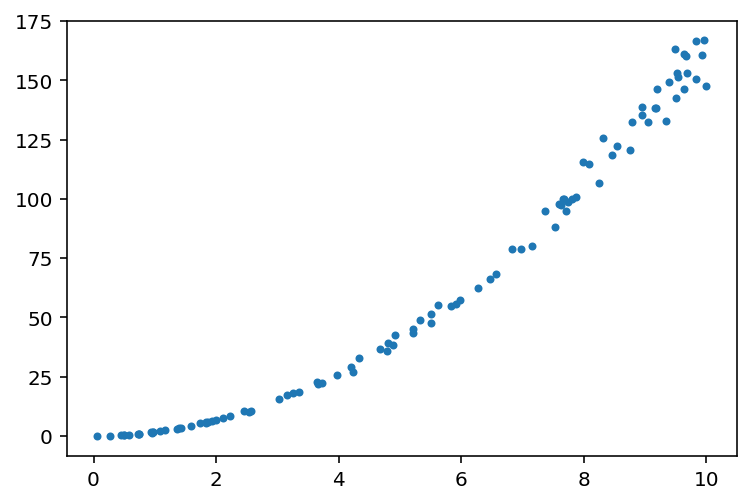

In [20]:
v, k = gen_kinetic()
plt.plot(v, k, '.')